# **Importing Packages**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# **Loading The Data**

In [28]:
df=pd.read_csv('/content/spam_dataset.csv')
df.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
 1   is_spam          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [30]:
df.shape

(1000, 2)

In [31]:
df.groupby('is_spam').describe()


message_content         \
                  count unique   
is_spam                          
0                   500    500   
1                   500    177   

                                                                 
                                                       top freq  
is_spam                                                          
0        Dear Brian,\n\nI wanted to let you know about ...    1  
1        Urgent! Your account has been compromised. Ver...    9

In [32]:
df.isnull().sum()

,0
message_content,0
is_spam,0


In [33]:
df.columns

Index(['message_content', 'is_spam'], dtype='object')

<ipython-input-38-abfdd025deef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_spam', data=df,palette = "Set2")


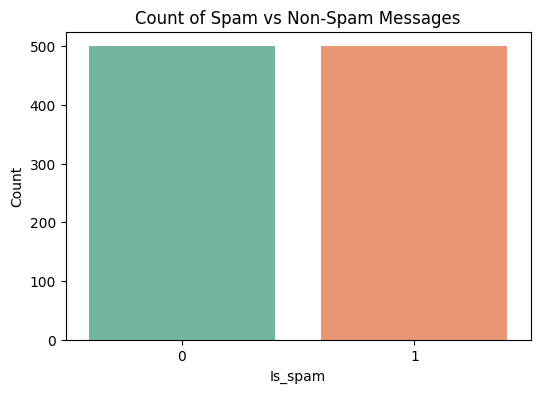

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_spam', data=df,palette = "Set2")
plt.title('Count of Spam vs Non-Spam Messages')
plt.xlabel('Is_spam')
plt.ylabel('Count')
plt.show()

# **Train-Test-Split**

In [40]:
X_train,X_test,y_train,y_test=train_test_split(df.message_content,df.is_spam,test_size=0.5,random_state=7)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((500,), (500,), (500,), (500,))

In [42]:
X_train[44]

'Hello Jerry,\n\nI wanted to follow up on our last conversation about the project status. Here are the details: Relate bag eat. Wrong enjoy south everybody five. Between bank administration drug nearly.\nRather deal ball arrive. Ground safe effort determine notice fall.\n\nKind regards,\nBrenda Cummings\n\nI’m happy to assist with any additional details you might need. Let me know how I can help.\n\nIf you have any questions, please feel free to reach out.'

In [43]:
X_test

,message_content
778,"Hello Anna,\n\nPlease review the attached docu..."
334,"Hey Mitchell,\n\nCan you please confirm your a..."
271,You have been selected to receive a special of...
802,"Dear Francisco,\n\nThank you for reaching out...."
216,Your loan has been approved! Transfer funds to...
...,...
322,"Hello Debra,\n\nJust wanted to touch base rega..."
770,"Hi Jill,\n\nJust a reminder about the deadline..."
598,You are our lucky winner! Claim your prize now...
582,"Dear Grace,\n\nI wanted to let you know about ..."


In [44]:
y_test

,is_spam
778,0
334,0
271,1
802,0
216,1
...,...
322,0
770,0
598,1
582,0


# **Data Preprocessing**

In [47]:
CV=CountVectorizer()

In [51]:
X_train_count=CV.fit_transform(X_train.values)

In [52]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
X_train_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
X_train_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 22535 stored elements and shape (500, 1568)>

In [ ]:
CV.vocabulary_

In [57]:
model=LogisticRegression()
model.fit(X_train_count,y_train)

LogisticRegression()

In [58]:
email=['Congratulations! Youve won $1,000,000!!!','Meeting Agenda for Tomorrow Team Call']
email_count=CV.transform(email)

In [59]:
X_test_count=CV.transform(X_test)
model.score(X_test_count,y_test)

1.0

In [60]:
email_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
y_predict=model.predict(X_test_count)
y_predict

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [62]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[243,   0],
       [  0, 257]])

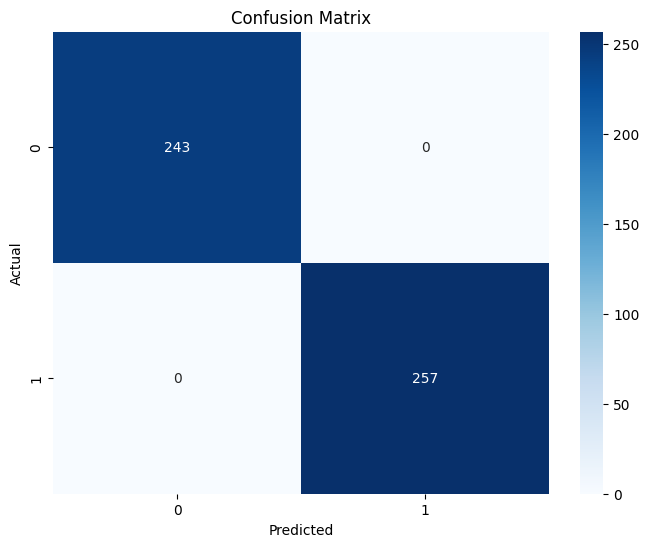

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       257

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [63]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the classification report
class_report = classification_report(y_test, y_predict)
print('Classification Report:')
print(class_report)